In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [39]:
try:
    df = pd.read_csv("gold_prices.csv")
    data_dict = df.to_dict(orient='records')

    split_data = [
    row['Date;Close/Last;Volume;Open;High;Low'].split(';')
    for row in data_dict
    ]

    columns = ['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']
    df = pd.DataFrame(split_data, columns=columns)

    numeric_cols = ['Close/Last', 'Open', 'High', 'Low']
    df[numeric_cols] = df[numeric_cols].astype(float)

    print(df)

except FileNotFoundError:
    print("file not found")


            Date  Close/Last  Volume    Open    High     Low
0     08/17/2023      1915.2  146770  1922.4  1933.5  1914.2
1     08/16/2023      1928.3  124766  1933.1  1938.2  1922.0
2     08/15/2023      1935.2  161512  1939.4  1944.3  1927.5
3     08/14/2023      1944.0  117514  1945.6  1948.2  1934.2
4     08/11/2023      1946.6  119090  1944.9  1953.6  1942.7
...          ...         ...     ...     ...     ...     ...
2534  08/23/2013      1395.8  149116  1376.1  1399.9  1367.8
2535  08/22/2013      1370.8  134493  1365.6  1381.4  1354.5
2536  08/21/2013      1370.1  137350  1371.0  1378.9  1359.2
2537  08/20/2013      1372.6  130096  1364.9  1378.0  1351.6
2538  08/19/2013      1365.7  116056  1377.1  1384.1  1362.0

[2539 rows x 6 columns]


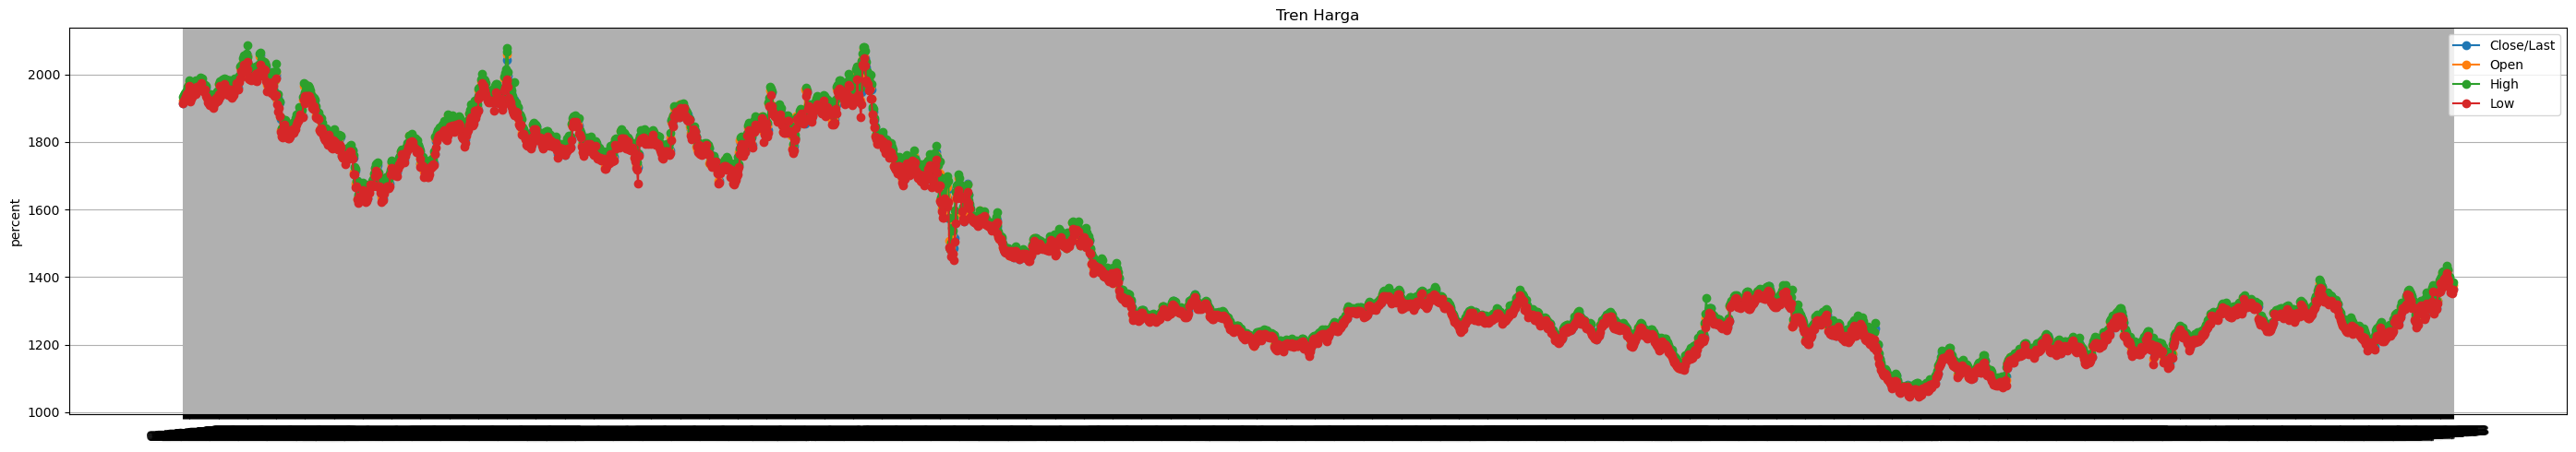

In [21]:
plt.figure(figsize=(28,5))

for data in ['Close/Last', 'Open', 'High', 'Low']:
    plt.plot(df['Date'], df[data], marker='o', label=data)

plt.title("Tren Harga")
plt.ylabel("percent")
plt.legend()
plt.grid(True)
plt.xticks(rotation=5)
plt.tight_layout()
plt.show()

1477.035880267822


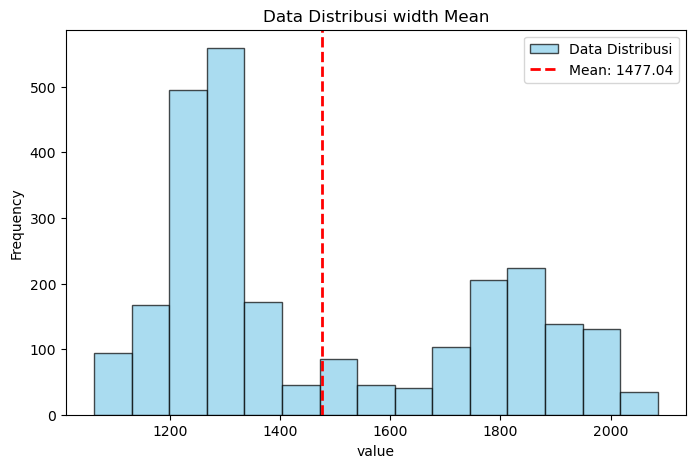

In [22]:
mean_value = np.mean(df["High"])
print(mean_value)
plt.figure(figsize=(8, 5))
plt.hist(df["High"], bins=15,color='skyblue', edgecolor='black', alpha=0.7, label="Data Distribusi")

plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')

plt.title('Data Distribusi width Mean')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

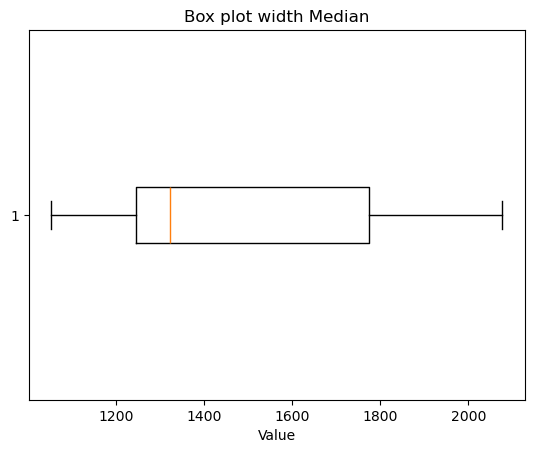

In [23]:
plt.boxplot(df["Open"], vert=False)
plt.title("Box plot width Median")
plt.xlabel("Value")
plt.show()

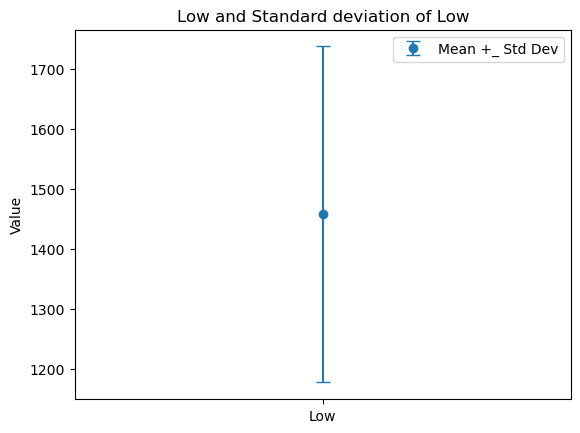

In [24]:
mean_low = df['Low'].mean()
std_low = df['Low'].std()
plt.errorbar(['Low'], [mean_low], yerr=[std_low], fmt='o', capsize=5, label='Mean +_ Std Dev')

plt.title('Low and Standard deviation of Low')
plt.ylabel('Value')
plt.legend()

plt.show()

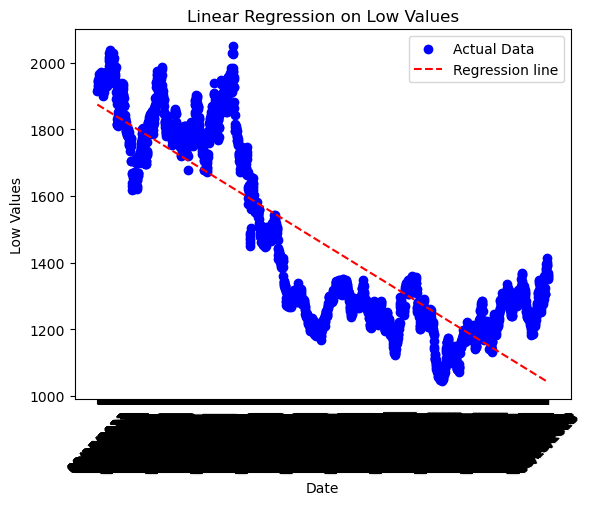

In [31]:
X = np.arange(len(df)).reshape(-1,1)
y = df['Low'].values
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
plt.scatter(df['Date'], y, label='Actual Data', color='blue', marker='o')

plt.plot(df['Date'], y_pred, label='Regression line', color='red', linestyle='--')

plt.title('Linear Regression on Low Values')
plt.xlabel('Date')
plt.ylabel('Low Values')
plt.legend()

plt.xticks(rotation=45)

plt.show()